In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as patches
from matplotlib import markers
from pandas.plotting import andrews_curves
import scipy.cluster.hierarchy as shc

from pyecharts import Bar, Boxplot, Pie, HeatMap

import warnings; warnings.filterwarnings(action='ignore')


large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [11]:
class GroupvariateEDA(object):
    """
    对于dataframe数据中多个字段的数据可视化。
    热力图：显示类别型数据两两之间的相关性
    pairwise绘制两两字段之间的关系
    """
    
    def __init__(self, data):
        """
        数据初始化，必须传入dataframe文件或者文件的有效路径。
        """
        #数值型类型
        self._numeric_type = ['int', 'int32', 'int64', 'float', 'float32', 'float64']
        
        #归一化函数
        self._log_scaler = lambda x: np.log10(x) / np.log10(max(x))
        self._min_max_scaler = lambda x:(x-np.min(x))/(np.max(x) - np.min(x))
        self._z_score_scaler = lambda x: (x - np.mean(x)) / np.std(x)
        self._no_scale = lambda x: x
        
        if isinstance(data, pd.DataFrame):
            self.data = data
        elif isinstance(data,str) and os.path.exists(data):
            self.fpath = data
            self.data = self._read_data()
        else:
            print('请输入dataframe文件')
            return 
        return
    
    def _read_data(self):
        """
        如果传入的是文件路径，自动读取文件。
        """
        self.data = pd.read_csv(self.fpath)
        return self.data
    
    def plot_heatmap(self, figsize=(10,6), cmap="RdYlGn"):
        """
        绘制类别型数据的热力图
        传入数据就是dataframe
        cmap是可供选择的颜色
        """
        
        plt.figure(figsize=figsize, dpi= 80)
        corr = self.data.corr()
        sns.heatmap(corr, 
                    xticklabels=corr.columns, 
                    yticklabels=corr.columns, 
                    cmap='RdYlGn',
                    center=0, 
                    annot=True)

        plt.title('Correlation ', fontsize=22)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()
        
        
    def plot_pairwise(self, figsize=(10,6),hue=None, kind='scatter'):
        """
        绘制两两之间的关系图
        
        kind:'scatter'散点图；'reg'添加最佳拟合直线
        hue: hue字段分类显示
        
        """
        plt.figure(figsize=figsize, dpi= 80)
        sns.pairplot(self.data, 
                     kind=kind,
                     hue=hue )
        plt.title('Pairwise ', fontsize=22)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()
    
    def plot_Andrews(self, x_category, group_category, figsize=(10,6)):
        """
        绘制Andrews曲线
        x_category: 如果曲线分明，表明x_category可以作为数据分类的根据
        """

        plt.figure(figsize=figsize, dpi= 80)

        andrews_curves(self.data[group_category], x_category, colormap='Set1')
        plt.gca().spines["top"].set_alpha(0)
        plt.gca().spines["bottom"].set_alpha(.3)
        plt.gca().spines["right"].set_alpha(0)
        plt.gca().spines["left"].set_alpha(.3)

        plt.title('Andrews Curves of '+ x_category, fontsize=22)
        plt.xlim(-3,3)
        plt.grid(alpha=0.3)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()

### 读取数据

In [12]:
fpath = './data/data2.csv'
plotGroup = GroupvariateEDA(fpath)

### andrews 曲线

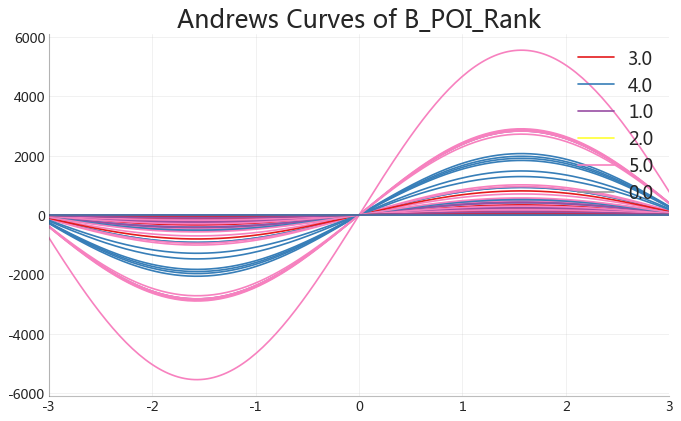

In [13]:
x_category = 'B_POI_Rank'
group_category = ['B_POI_Rank', 'Is_Demand', 'B_POI_Hitcount', 'B_Caption_Is_Match']
plotGroup.plot_Andrews(x_category, group_category)


### 热力图

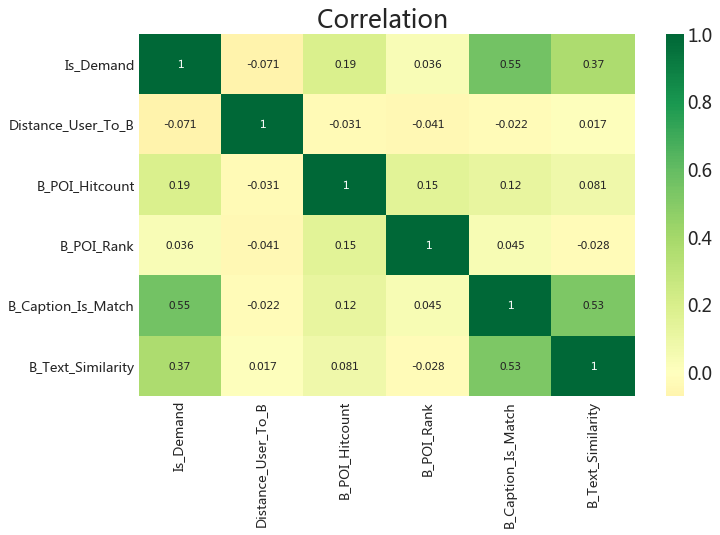

In [14]:
plotGroup.plot_heatmap()

### pairwise 图

<Figure size 1120x800 with 0 Axes>

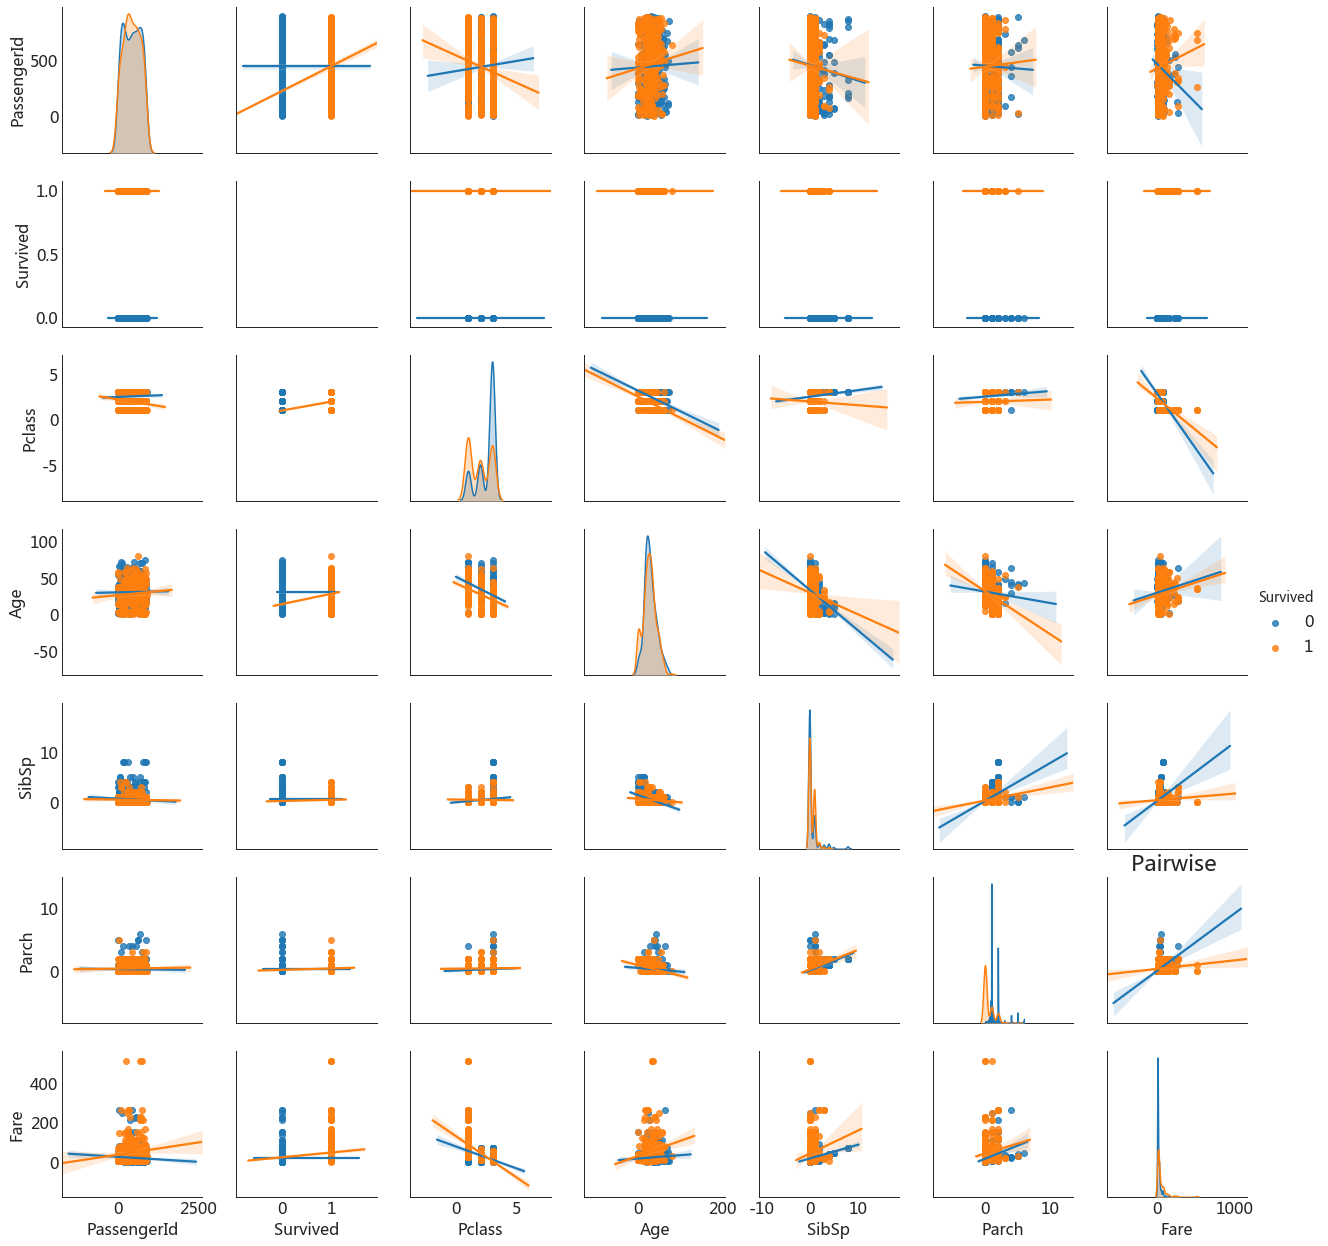

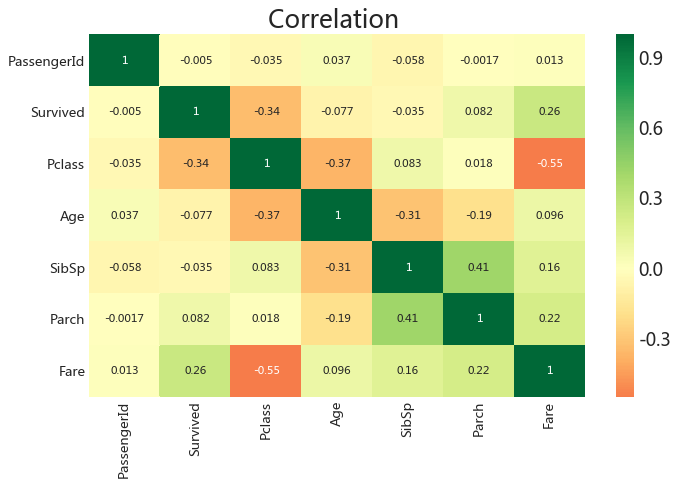

In [15]:
fpath = './data/train.csv'
plotGroup = GroupvariateEDA(fpath)
plotGroup.plot_pairwise(figsize = (14,10), kind = 'reg', hue='Survived')
plotGroup.plot_heatmap()